In [1]:
%tensorflow_version 2.x 
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() 

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0,23,25]

216

In [5]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

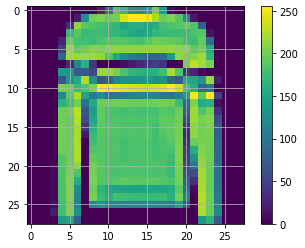

'Pullover'

In [7]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(True)
plt.show()
class_names[train_labels[5]]

In [8]:
#Data Preprocessing.Fitting data to scale.
train_images = train_images / 255.0

test_images = test_images / 255.0

In [9]:
#Building a model.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [10]:
#compiling a model.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=15)  #Training the model. 

Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5046 - accuracy: 0.8240
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3812 - accuracy: 0.8623
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3404 - accuracy: 0.8766
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3136 - accuracy: 0.8848
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2950 - accuracy: 0.8911
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2818 - accuracy: 0.8963
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2678 - accuracy: 0.9012
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2575 - accuracy: 0.9045
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2467 - accuracy: 0.9072
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.237

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.3312 - accuracy: 0.8911
Test accuracy: 0.8910999894142151


In [13]:
predictions = model.predict(test_images)

In [14]:
predictions

array([[8.0836843e-10, 1.2390082e-11, 3.9404200e-12, ..., 2.6959949e-03,
        2.5126699e-08, 9.9725288e-01],
       [5.6997892e-06, 5.9501510e-14, 9.9927491e-01, ..., 3.6452100e-16,
        1.2260363e-11, 1.6748517e-13],
       [2.9956176e-12, 1.0000000e+00, 1.6524425e-15, ..., 7.7778363e-28,
        9.4693625e-16, 7.2081227e-22],
       ...,
       [2.1437701e-05, 3.1417571e-13, 7.9870816e-08, ..., 2.3532322e-14,
        9.9997532e-01, 1.2920301e-18],
       [1.8107152e-10, 9.9999988e-01, 1.9199808e-11, ..., 2.1661724e-20,
        3.7044170e-12, 5.3471851e-16],
       [3.8098312e-07, 7.4284240e-10, 2.9244145e-08, ..., 7.2514005e-03,
        2.9109698e-04, 8.6904256e-06]], dtype=float32)

Predicted : Bag


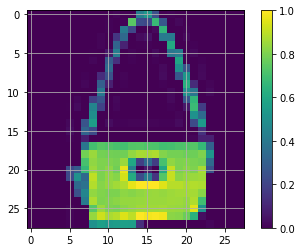

Expected : Bag


In [15]:
print("Predicted : " +class_names[np.argmax(predictions[31])])
plt.figure()
plt.imshow(test_images[31])
plt.colorbar()
plt.grid(True)
plt.show()
print("Expected : " +class_names[test_labels[31]])

# Program to verify the Model.

Pick a number: 108
Expected : Ankle boot
Guess : Ankle boot


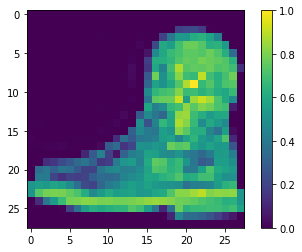

In [16]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]
  print("Expected : " + class_names[correct_label])
  print("Guess : " +predicted_class)
  show_image(image)


def show_image(img):
  plt.figure()
  plt.imshow(img)#cmap=plt.cm.binary
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)

In [17]:
#Got an average accuracy of 88.2% on the test set with 10 as epochs
#Got an average accuracy of 89.1% on the test set with 15 as epochs.